In [26]:
import qiskit
import pylatexenc
import qiskit_ibm_runtime


## Check Version

In [27]:
print(f"My Qiskit Version=={qiskit.__version__}\n")

My Qiskit Version==1.1.1



## Link qiskit To IBM's RunTime Envirenment

In [28]:
try:
    myService = qiskit_ibm_runtime.QiskitRuntimeService(channel="ibm_quantum",
                    token='YourAPIToken')
    print("Link Qiskit To IBM's Runtime Environment: Success.\n")
except:
    print("Link Qiskit To IBM's Runtime Environment: Failed.\n")

try:
    qiskit_ibm_runtime.QiskitRuntimeService.save_account(channel="ibm_quantum",
                    token='YourAPIToken', overwrite=True)
    print("My Account Saved Successfuly.\n")
except:
    print("Can't Save This Acount.\n")

Link Qiskit To IBM's Runtime Environment: Success.

My Account Saved Successfuly.



## Get My Quantum computer

In [29]:
computerName = 'ibm_sherbrooke'
try:
    myQuantumComputer = myService.backend(name=computerName)
    print(f"The Access To The {computerName} Computer Done!\n")
except:
    print(f"Can't Access To This Device: {computerName}.\n")

The Access To The ibm_sherbrooke Computer Done!



# Check The Number Of QBits In My Computer

In [30]:
print(f"\n\nNumber Of Qubits In The Computer {computerName}: {myQuantumComputer.num_qubits}\n")



Number Of Qubits In The Computer ibm_sherbrooke: 127



## Prepare Two Qubits BellState

* Step1: Map The Problem To Circuits And Operators

- Circuits.



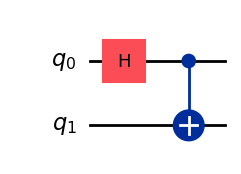

In [31]:
print("- Circuits.\n")
quantumCircuirs = qiskit.QuantumCircuit(2) # Generate Quantum Circuit That Has Two Qubits On It

quantumCircuirs.h(0) # h Is The Hadamard Gate An It's A Quantum Gate In Computer Science That Creates A Superposition State From A Normal 0 Or 1.
quantumCircuirs.cx(0, 1) # cx Is The Controlled Pauli-X Gate Also Called The CNOT Gate, This Gate Involves Two Qubits i And j In A n-qubit System.
# (One of the two qubits (say qubit i) is the target qubit whereas the other qubit plays the role of control).
quantumCircuirs.draw(output='mpl')

In [32]:
print("- Operators.\n")
# ZZ = qiskit.quantum_info.Pauli('ZZ')
# ZI = qiskit.quantum_info.Pauli('ZI')
# IZ = qiskit.quantum_info.Pauli('IZ')
# XX = qiskit.quantum_info.Pauli('XX')
# XI = qiskit.quantum_info.Pauli('XI')
# IX = qiskit.quantum_info.Pauli('IX')
operatorsStr = ["ZZ", "ZI", "IZ", "XX", "XI", "IX"]
observables = list()

for i in operatorsStr:
    observables.append(qiskit.quantum_info.Pauli(i))
print(f"ObservaBles=> {observables}\n")

- Operators.

ObservaBles=> [Pauli('ZZ'), Pauli('ZI'), Pauli('IZ'), Pauli('XX'), Pauli('XI'), Pauli('IX')]



* Step2: Optimize The Circuit Of The Observables

In [33]:
print('NB: Nothing To Optimize Here So Skip :D.')

NB: Nothing To Optimize Here So Skip :D.


* Step3: Execute On The Backend

In [34]:
import qiskit_aer.primitives

An Estimator Primitive computes expectation values of observables with respect to states prepared by quantum circuits.\
Users generally specify a list of circuits, observables, and possibly some additional configuration, with which the program can efficiently evaluate expectation values and variances.

In [46]:
myEstimator = qiskit_aer.primitives.Estimator()
TheJob = myEstimator.run([quantumCircuirs] * len(observables), observables)
values = TheJob.result().values
print(f"The Expectation Values Of Our Observales By Using The States Prepared By `quantumCircuits` Are:")
for i in range(len(values)):
    print(f"For The Elment {operatorsStr[i]}=> {values[i]}")

The Expectation Values Of Our Observales By Using The States Prepared By `quantumCircuits` Are:
For The Elment ZZ=> 1.0
For The Elment ZI=> -0.033203125
For The Elment IZ=> -0.033203125
For The Elment XX=> 1.0
For The Elment XI=> -0.0234375
For The Elment IX=> -0.0234375


## Step4: Post Process And Plotting

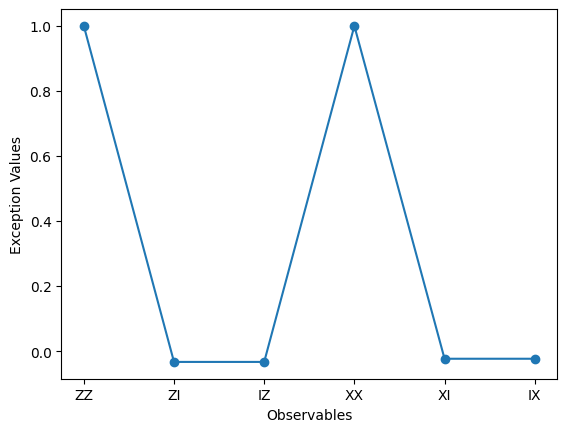

In [47]:
import matplotlib.pyplot

matplotlib.pyplot.plot(operatorsStr, values, '-o')
matplotlib.pyplot.xlabel("Observables")
matplotlib.pyplot.ylabel("Exception Values")
matplotlib.pyplot.show()